In [5]:
import matplotlib
import csv
import matplotlib.pyplot as plt
import scipy
import plotly.graph_objects as go
import scipy.stats as st
import numpy as np
import statistics
from scipy.stats import norm
import seaborn as sns
%matplotlib inline


def calculate_confidence(x):
    confidence = st.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=st.sem(x))
    return confidence

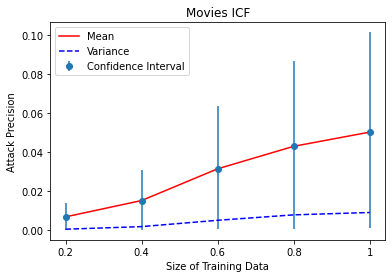

In [7]:
# How much Training Data should we observe?
train_data_icf = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Training_data'] in train_data_icf:
                train_data_icf[row['Training_data']].append(row['Precision'])
            else:
                train_data_icf[row['Training_data']] = [row['Precision']]
            
x = list(train_data_icf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_icf.values())[::-1]]
var = [np.var([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]

cf = [list(l) for l in cf]

min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')

yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')
plt.title("Movies ICF")
plt.xlabel("Size of Training Data")
plt.ylabel("Attack Precision")
plt.legend(loc="upper left")
plt.show()

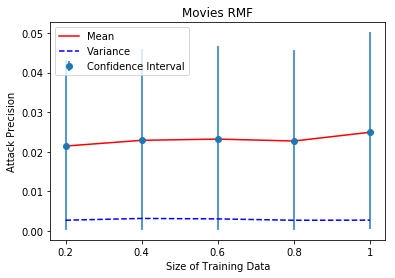

In [4]:
# How much Training Data should we observe?
import csv
import matplotlib.pyplot as plt
import scipy

def calculate_confidence(x):
    confidence = st.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=st.sem(x))
    return confidence

train_data_mf = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Training_data'] in train_data_mf:
                train_data_mf[row['Training_data']].append(row['Precision'])
            else:
                train_data_mf[row['Training_data']] = [row['Precision']]
            
x = list(train_data_mf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_mf.values())[::-1]]
var = [np.var([float(v) for v in l]) for l in list(train_data_mf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_mf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')
plt.title("Movies RMF")
plt.xlabel("Size of Training Data")
plt.ylabel("Attack Precision")
plt.legend(loc="upper left")
plt.show()

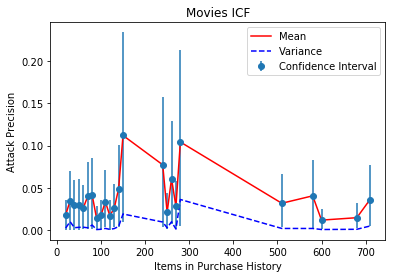

In [5]:
org_items_dict = {}

with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            count = int(row['Original Items'])
            new_count = count - (count % 10)
            if new_count in org_items_dict:
                org_items_dict[new_count].append(row['Precision'])
            else:
                org_items_dict[new_count] = [row['Precision']]
            
org_items_dict = sorted(org_items_dict.items(), key = lambda kv:kv[0])
org_items_arr, org_items_vals = [], []


var, cf = [], []
for val in org_items_dict:
    org_items_arr.append(float(val[0]))
    org_items_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
    var.append(np.var([float(l) for l in val[1]]))
    cf.append(calculate_confidence([float(l) for l in val[1]]))
    

plt.plot(org_items_arr, org_items_vals, linestyle='-', color = 'r', label = 'Mean')
plt.plot(org_items_arr, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(org_items_arr, org_items_vals ,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.xlabel("Items in Purchase History")
plt.title("Movies ICF")
plt.ylabel("Attack Precision")
plt.legend()
plt.show()

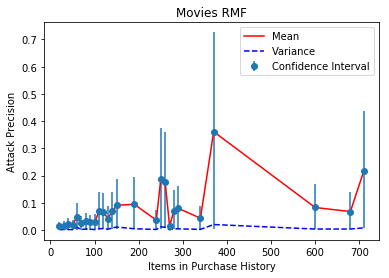

In [6]:
org_items_dict = {}

with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            count = int(row['Original Items'])
            new_count = count - (count % 10)
            if new_count in org_items_dict:
                org_items_dict[new_count].append(row['Precision'])
            else:
                org_items_dict[new_count] = [row['Precision']]
            
org_items_dict = sorted(org_items_dict.items(), key = lambda kv:kv[0])
org_items_arr, org_items_vals = [], []

var, cf = [], []
for val in org_items_dict:
    org_items_arr.append(float(val[0]))
    org_items_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
    var.append(np.var([float(l) for l in val[1]]))
    cf.append(calculate_confidence([float(l) for l in val[1]]))

plt.plot(org_items_arr, org_items_vals, linestyle='-', color = 'r', label = 'Mean')
plt.plot(org_items_arr, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(org_items_arr, org_items_vals ,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.xlabel("Items in Purchase History")
plt.title("Movies RMF")
plt.ylabel("Attack Precision")
plt.legend()
plt.show()

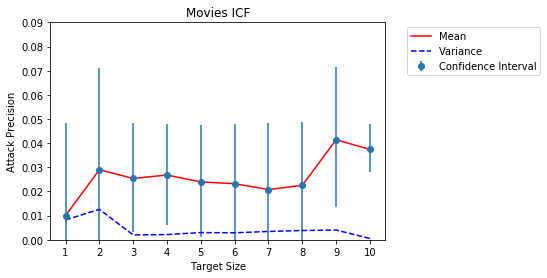

In [7]:
target_data_icf = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Target_Size'] in target_data_icf:
                target_data_icf[row['Target_Size']].append(row['Precision'])
            else:
                target_data_icf[row['Target_Size']] = [row['Precision']]
            
x = list(target_data_icf.keys())
y = [sum([float(v) for v in l]) /len(l) for l in list(target_data_icf.values())]

var = [np.var([float(v) for v in l]) for l in list(target_data_icf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(target_data_icf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies ICF")
plt.xlabel("Target Size")
plt.gca().set_ylim(0, 0.09)
plt.ylabel("Attack Precision")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

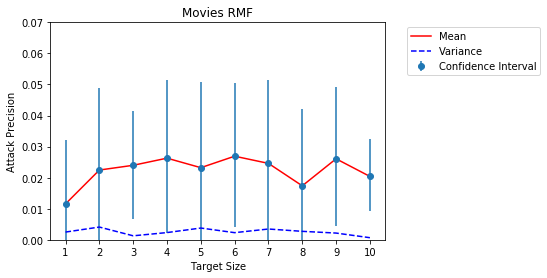

In [8]:
target_data_mf = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Target_Size'] in target_data_mf:
                target_data_mf[row['Target_Size']].append(row['Precision'])
            else:
                target_data_mf[row['Target_Size']] = [row['Precision']]
            
x = list(target_data_mf.keys())
y = [sum([float(v) for v in l]) /len(l) for l in list(target_data_mf.values())]

var = [np.var([float(v) for v in l]) for l in list(target_data_mf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(target_data_mf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies RMF")
plt.xlabel("Target Size")
plt.ylabel("Attack Precision")
plt.gca().set_ylim(0, 0.07)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

12 12


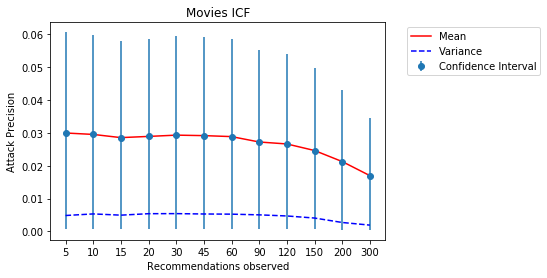

In [9]:
# How many user recommendations should we observe?
train_data_icf = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Num of Recs(K_O)'] in train_data_icf:
                train_data_icf[row['Num of Recs(K_O)']].append(row['Precision'])
            else:
                train_data_icf[row['Num of Recs(K_O)']] = [row['Precision']]
            
x = list(train_data_icf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_icf.values())[::-1]]

print(len(x), len(y))

var = [np.var([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies ICF")
plt.xlabel("Recommendations observed")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Attack Precision")
plt.show()

12 12


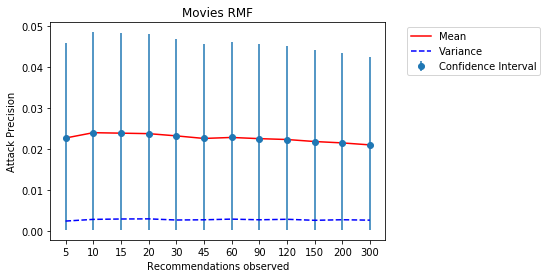

In [10]:
# How many user recommendations should we observe?
train_data_mf = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Num of Recs(K_O)'] in train_data_mf:
                train_data_mf[row['Num of Recs(K_O)']].append(row['Precision'])
            else:
                train_data_mf[row['Num of Recs(K_O)']] = [row['Precision']]
            
x = list(train_data_mf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_mf.values())[::-1]]

print(len(x), len(y))

var = [np.var([float(v) for v in l]) for l in list(train_data_mf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_mf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies RMF")
plt.xlabel("Recommendations observed")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Attack Precision")
plt.show()

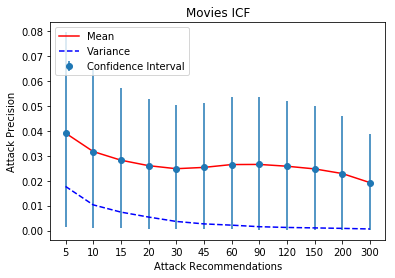

In [11]:
# How many attack recommendations yeild the max benefit?
train_data_icf = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Num_of_preds(K_A)'] in train_data_icf:
                train_data_icf[row['Num_of_preds(K_A)']].append(row['Precision'])
            else:
                train_data_icf[row['Num_of_preds(K_A)']] = [row['Precision']]
            
x = list(train_data_icf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_icf.values())[::-1]]

var = [np.var([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies ICF")
plt.xlabel("Attack Recommendations")
plt.ylabel("Attack Precision")
plt.legend(loc="upper left")
plt.show()

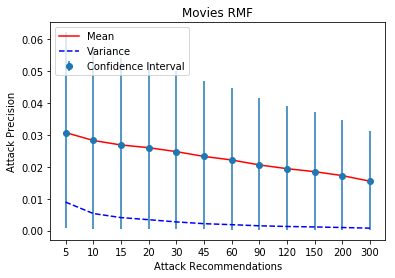

In [12]:
# How many attack recommendations yeild the max benefit?
train_data_mf = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Num_of_preds(K_A)'] in train_data_mf:
                train_data_mf[row['Num_of_preds(K_A)']].append(row['Precision'])
            else:
                train_data_mf[row['Num_of_preds(K_A)']] = [row['Precision']]
            
x = list(train_data_mf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_mf.values())[::-1]]

var = [np.var([float(v) for v in l]) for l in list(train_data_mf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_mf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies RMF")
plt.xlabel("Attack Recommendations")
plt.ylabel("Attack Precision")
plt.legend(loc="upper left")
plt.show()

[0.026747600420180446, 0.02277046985446314]
[0.004582434246010349, 0.0028660756829673012]
[(0.026547006935592758, 0.026948193904768134), (0.02265500463876067, 0.022885935070165606)]


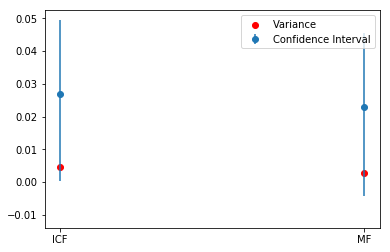

In [13]:
# Precision Metrics for both the algorithms
precision, precision2 = [], []
train_data = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            precision.append(float(row['Precision']))
            
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            precision2.append(float(row['Precision']))

m1 = statistics.mean(precision)
m2 = statistics.mean(precision2)

v1 = np.var(precision)
v2 = np.var(precision2)

c1 = calculate_confidence(precision)
c2 = calculate_confidence(precision2)

min_error1 = c1[0]
max_error1 = c1[1]
yerror1 = [min_error1, max_error1]

min_error2 = c2[0]
max_error2 = c2[1]
yerror2 = [min_error2, max_error2]

yerror = [yerror1, yerror2]
mean = [m1, m2]

var = [v1, v2]
c = [c1, c2]

print(mean)
print(var)
print(c)
x = ['ICF', 'MF']
plt.scatter(x, var, color ='r', label = 'Variance')

plt.errorbar(x,mean,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.legend()

plt.show()

In [14]:


icf_precision = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Training_data'] in icf_precision:
                icf_precision[row['Training_data']].append(row['Precision'])
            else:
                icf_precision[row['Training_data']] = []

# Pythopn 3.5+
labels, data = [*zip(*icf_precision.items())]  # 'transpose' items to parallel key, value lists

fig = go.Figure()
nd = []
for i,row in enumerate(data):
    fig.add_trace(go.Box(y=np.array(row).astype(np.float), quartilemethod="linear", name=labels[i]))

fig.update_layout(title_text="Training Data ICF Boxplots",
                 xaxis_title="Percentage of training data",
                 yaxis_title="Precision")
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
mf_precision = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Training_data'] in mf_precision:
                mf_precision[row['Training_data']].append(row['Precision'])
            else:
                mf_precision[row['Training_data']] = []

# Pythopn 3.5+
labels, data = [*zip(*mf_precision.items())]  # 'transpose' items to parallel key, value lists

fig = go.Figure()
nd = []
for i,row in enumerate(data):
    fig.add_trace(go.Box(y=np.array(row).astype(np.float), quartilemethod="linear", name=labels[i]))
    
fig.update_layout(title_text="Training Data MF Boxplots",
                 xaxis_title="Percentage of training data",
                 yaxis_title="Precision")
fig.show()


In [ ]:
icf_target_precision = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Target_Size'] in icf_target_precision:
                icf_target_precision[row['Target_Size']].append(row['Precision'])
            else:
                icf_target_precision[row['Target_Size']] = []

# Pythopn 3.5+
labels, data = [*zip(*icf_target_precision.items())]  # 'transpose' items to parallel key, value lists

fig = go.Figure()
nd = []
for i,row in enumerate(data):
    fig.add_trace(go.Box(y=np.array(row).astype(np.float),  name=labels[i]))
    
fig.update_layout(title_text="ICF Target Size Boxplots",
                 xaxis_title="Number of targets",
                 yaxis_title="Precision")
fig.show()


In [ ]:
mf_target_precision = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Target_Size'] in mf_target_precision:
                mf_target_precision[row['Target_Size']].append(row['Precision'])
            else:
                mf_target_precision[row['Target_Size']] = []

# Pythopn 3.5+
labels, data = [*zip(*icf_target_precision.items())]  # 'transpose' items to parallel key, value lists

fig = go.Figure()
nd = []
for i,row in enumerate(data):
    fig.add_trace(go.Box(y=np.array(row).astype(np.float),  name=labels[i]))
    
fig.update_layout(title_text="MF Target Size Boxplots",
                 xaxis_title="Number of targets",
                 yaxis_title="Precision")
fig.show()


# Recall

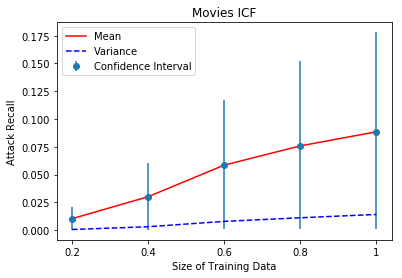

In [15]:
# How much Training Data should we observe?
train_data_icf = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Training_data'] in train_data_icf:
                train_data_icf[row['Training_data']].append(row['Recall'])
            else:
                train_data_icf[row['Training_data']] = [row['Recall']]
            
x = list(train_data_icf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_icf.values())[::-1]]
var = [np.var([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]

cf = [list(l) for l in cf]

min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')

yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')
plt.title("Movies ICF")
plt.xlabel("Size of Training Data")
plt.ylabel("Attack Recall")
plt.legend(loc="upper left")
plt.show()

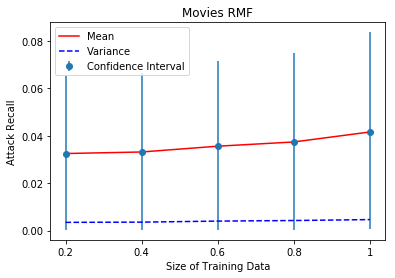

In [16]:
# How much Training Data should we observe?
import csv
import matplotlib.pyplot as plt
import scipy

def calculate_confidence(x):
    confidence = st.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=st.sem(x))
    return confidence

train_data_mf = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Training_data'] in train_data_mf:
                train_data_mf[row['Training_data']].append(row['Recall'])
            else:
                train_data_mf[row['Training_data']] = [row['Recall']]
            
x = list(train_data_mf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_mf.values())[::-1]]
var = [np.var([float(v) for v in l]) for l in list(train_data_mf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_mf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')
plt.title("Movies RMF")
plt.xlabel("Size of Training Data")
plt.ylabel("Attack Recall")
plt.legend(loc="upper left")
plt.show()

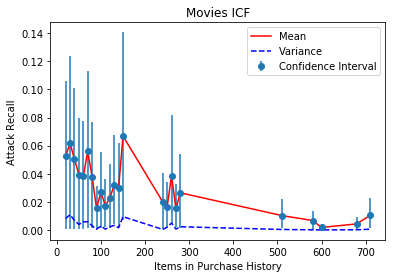

In [17]:
import csv
import matplotlib.pyplot as plt
org_items_dict = {}

with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            count = int(row['Original Items'])
            new_count = count - (count % 10)
            if new_count in org_items_dict:
                org_items_dict[new_count].append(row['Recall'])
            else:
                org_items_dict[new_count] = [row['Recall']]
            
org_items_dict = sorted(org_items_dict.items(), key = lambda kv:kv[0])
org_items_arr, org_items_vals = [], []


var, cf = [], []
for val in org_items_dict:
    org_items_arr.append(float(val[0]))
    org_items_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
    var.append(np.var([float(l) for l in val[1]]))
    cf.append(calculate_confidence([float(l) for l in val[1]]))
    

plt.plot(org_items_arr, org_items_vals, linestyle='-', color = 'r', label = 'Mean')
plt.plot(org_items_arr, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(org_items_arr, org_items_vals ,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.xlabel("Items in Purchase History")
plt.title("Movies ICF")
plt.ylabel("Attack Recall")
plt.legend()
plt.show()

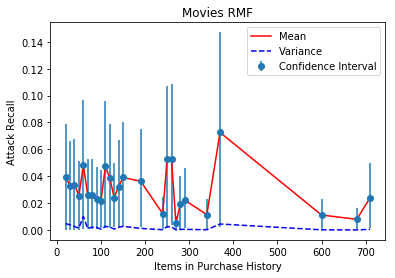

In [18]:
import csv
import matplotlib.pyplot as plt
org_items_dict = {}

with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            count = int(row['Original Items'])
            new_count = count - (count % 10)
            if new_count in org_items_dict:
                org_items_dict[new_count].append(row['Recall'])
            else:
                org_items_dict[new_count] = [row['Recall']]
            
org_items_dict = sorted(org_items_dict.items(), key = lambda kv:kv[0])
org_items_arr, org_items_vals = [], []


var, cf = [], []
for val in org_items_dict:
    org_items_arr.append(float(val[0]))
    org_items_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
    var.append(np.var([float(l) for l in val[1]]))
    cf.append(calculate_confidence([float(l) for l in val[1]]))
    

plt.plot(org_items_arr, org_items_vals, linestyle='-', color = 'r', label = 'Mean')
plt.plot(org_items_arr, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(org_items_arr, org_items_vals ,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.xlabel("Items in Purchase History")
plt.title("Movies RMF")
plt.ylabel("Attack Recall")
plt.legend()
plt.show()

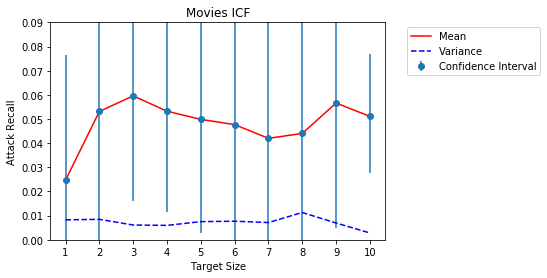

In [19]:
import csv

target_data_icf = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Target_Size'] in target_data_icf:
                target_data_icf[row['Target_Size']].append(row['Recall'])
            else:
                target_data_icf[row['Target_Size']] = [row['Recall']]
            
x = list(target_data_icf.keys())
y = [sum([float(v) for v in l]) /len(l) for l in list(target_data_icf.values())]

var = [np.var([float(v) for v in l]) for l in list(target_data_icf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(target_data_icf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies ICF")
plt.xlabel("Target Size")
plt.gca().set_ylim(0, 0.09)
plt.ylabel("Attack Recall")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

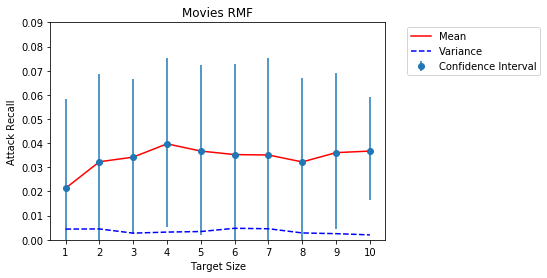

In [20]:
import csv

target_data_mf = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Target_Size'] in target_data_mf:
                target_data_mf[row['Target_Size']].append(row['Recall'])
            else:
                target_data_mf[row['Target_Size']] = [row['Recall']]
            
x = list(target_data_mf.keys())
y = [sum([float(v) for v in l]) /len(l) for l in list(target_data_mf.values())]

var = [np.var([float(v) for v in l]) for l in list(target_data_mf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(target_data_mf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies RMF")
plt.xlabel("Target Size")
plt.gca().set_ylim(0, 0.09)
plt.ylabel("Attack Recall")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

12 12


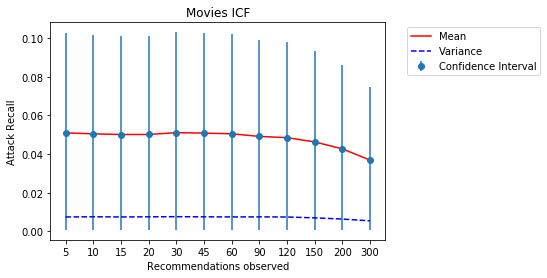

In [21]:
# How many user recommendations should we observe?
import csv

train_data_icf = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Num of Recs(K_O)'] in train_data_icf:
                train_data_icf[row['Num of Recs(K_O)']].append(row['Recall'])
            else:
                train_data_icf[row['Num of Recs(K_O)']] = [row['Recall']]
            
x = list(train_data_icf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_icf.values())[::-1]]

print(len(x), len(y))

var = [np.var([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies ICF")
plt.xlabel("Recommendations observed")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Attack Recall")
plt.show()

12 12


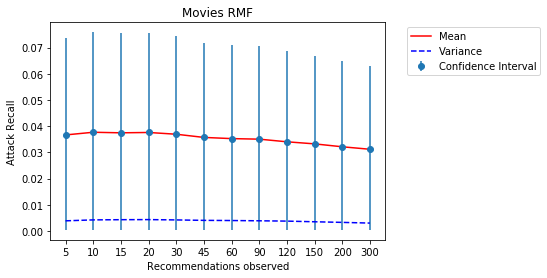

In [22]:
# How many user recommendations should we observe?
import csv

train_data_icf = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Num of Recs(K_O)'] in train_data_icf:
                train_data_icf[row['Num of Recs(K_O)']].append(row['Recall'])
            else:
                train_data_icf[row['Num of Recs(K_O)']] = [row['Recall']]
            
x = list(train_data_icf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_icf.values())[::-1]]

print(len(x), len(y))

var = [np.var([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies RMF")
plt.xlabel("Recommendations observed")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Attack Recall")
plt.show()

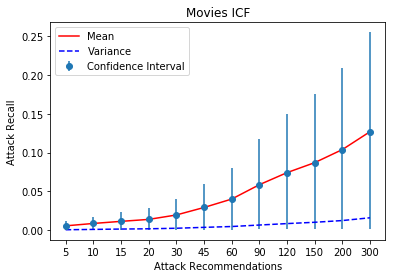

In [23]:
# How many attack recommendations yeild the max benefit?

import csv

train_data_icf = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Num_of_preds(K_A)'] in train_data_icf:
                train_data_icf[row['Num_of_preds(K_A)']].append(row['Recall'])
            else:
                train_data_icf[row['Num_of_preds(K_A)']] = [row['Recall']]
            
x = list(train_data_icf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_icf.values())[::-1]]

var = [np.var([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies ICF")
plt.xlabel("Attack Recommendations")
plt.ylabel("Attack Recall")
plt.legend(loc="upper left")
plt.show()

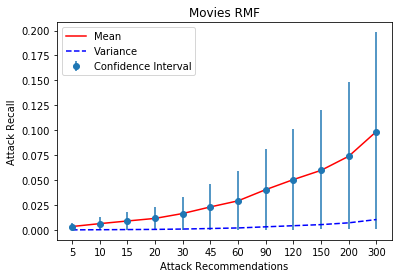

In [24]:
# How many attack recommendations yeild the max benefit?

import csv

train_data_mf = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Num_of_preds(K_A)'] in train_data_mf:
                train_data_mf[row['Num_of_preds(K_A)']].append(row['Recall'])
            else:
                train_data_mf[row['Num_of_preds(K_A)']] = [row['Recall']]
            
x = list(train_data_mf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_mf.values())[::-1]]

var = [np.var([float(v) for v in l]) for l in list(train_data_mf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_mf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies RMF")
plt.xlabel("Attack Recommendations")
plt.ylabel("Attack Recall")
plt.legend(loc="upper left")
plt.show()

[0.04814931620396697, 0.03525111100812907]
[0.007215217444358036, 0.0038820020402654904]
[(0.047897610293431904, 0.04840102211450207), (0.0351167308265273, 0.035385491189730854)]


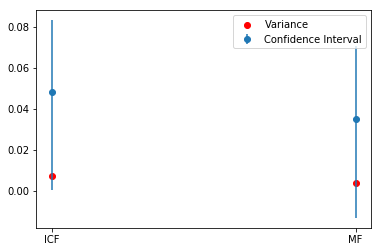

In [25]:
# Precision Metrics for both the algorithms

import csv
import statistics
from scipy.stats import norm
import seaborn as sns

precision, precision2 = [], []
train_data = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader: 
        if row['Rating'] == '5':
            precision.append(float(row['Recall']))
            
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            precision2.append(float(row['Recall']))

m1 = statistics.mean(precision)
m2 = statistics.mean(precision2)

v1 = np.var(precision)
v2 = np.var(precision2)

c1 = calculate_confidence(precision)
c2 = calculate_confidence(precision2)

min_error1 = c1[0]
max_error1 = c1[1]
yerror1 = [min_error1, max_error1]

min_error2 = c2[0]
max_error2 = c2[1]
yerror2 = [min_error2, max_error2]

yerror = [yerror1, yerror2]
mean = [m1, m2]

var = [v1, v2]
c = [c1, c2]

print(mean)
print(var)
print(c)
x = ['ICF', 'MF']
plt.scatter(x, var, color ='r', label = 'Variance')

plt.errorbar(x,mean,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.legend()

plt.show()

# NDCG

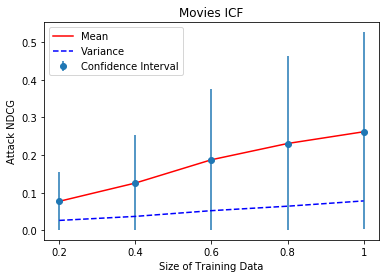

In [26]:
# How much Training Data should we observe?
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

def calculate_confidence(x):
    confidence = st.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=st.sem(x))
    return confidence
    

train_data_icf = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Training_data'] in train_data_icf:
                train_data_icf[row['Training_data']].append(row['NDCG'])
            else:
                train_data_icf[row['Training_data']] = [row['NDCG']]
            
x = list(train_data_icf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_icf.values())[::-1]]
var = [np.var([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]

cf = [list(l) for l in cf]

min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')

yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')
plt.title("Movies ICF")
plt.xlabel("Size of Training Data")
plt.ylabel("Attack NDCG")
plt.legend(loc="upper left")
plt.show()

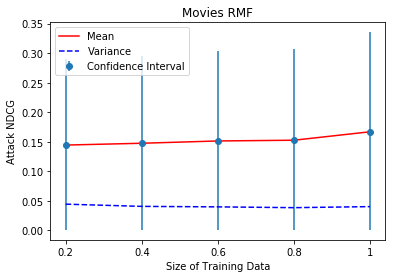

In [27]:
# How much Training Data should we observe?
import csv
import matplotlib.pyplot as plt
import scipy

def calculate_confidence(x):
    confidence = st.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=st.sem(x))
    return confidence

train_data_mf = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Training_data'] in train_data_mf:
                train_data_mf[row['Training_data']].append(row['NDCG'])
            else:
                train_data_mf[row['Training_data']] = [row['NDCG']]
            
x = list(train_data_mf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_mf.values())[::-1]]
var = [np.var([float(v) for v in l]) for l in list(train_data_mf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_mf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')
plt.title("Movies RMF")
plt.xlabel("Size of Training Data")
plt.ylabel("Attack NDCG")
plt.legend(loc="upper left")
plt.show()

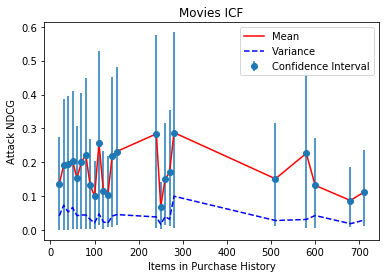

In [28]:
import csv
import matplotlib.pyplot as plt
org_items_dict = {}

with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            count = int(row['Original Items'])
            new_count = count - (count % 10)
            if new_count in org_items_dict:
                org_items_dict[new_count].append(row['NDCG'])
            else:
                org_items_dict[new_count] = [row['NDCG']]
            
org_items_dict = sorted(org_items_dict.items(), key = lambda kv:kv[0])
org_items_arr, org_items_vals = [], []


var, cf = [], []
for val in org_items_dict:
    org_items_arr.append(float(val[0]))
    org_items_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
    var.append(np.var([float(l) for l in val[1]]))
    cf.append(calculate_confidence([float(l) for l in val[1]]))
    

plt.plot(org_items_arr, org_items_vals, linestyle='-', color = 'r', label = 'Mean')
plt.plot(org_items_arr, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(org_items_arr, org_items_vals ,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.xlabel("Items in Purchase History")
plt.title("Movies ICF")
plt.ylabel("Attack NDCG")
plt.legend()
plt.show()

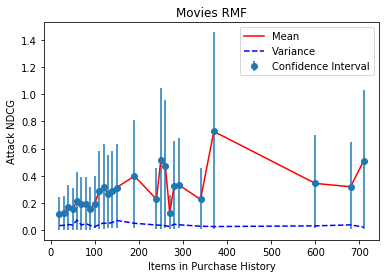

In [29]:
import csv
import matplotlib.pyplot as plt
org_items_dict = {}

with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            count = int(row['Original Items'])
            new_count = count - (count % 10)
            if new_count in org_items_dict:
                org_items_dict[new_count].append(row['NDCG'])
            else:
                org_items_dict[new_count] = [row['NDCG']]
            
org_items_dict = sorted(org_items_dict.items(), key = lambda kv:kv[0])
org_items_arr, org_items_vals = [], []


var, cf = [], []
for val in org_items_dict:
    org_items_arr.append(float(val[0]))
    org_items_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
    var.append(np.var([float(l) for l in val[1]]))
    cf.append(calculate_confidence([float(l) for l in val[1]]))
    

plt.plot(org_items_arr, org_items_vals, linestyle='-', color = 'r', label = 'Mean')
plt.plot(org_items_arr, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(org_items_arr, org_items_vals ,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.xlabel("Items in Purchase History")
plt.title("Movies RMF")
plt.ylabel("Attack NDCG")
plt.legend()
plt.show()

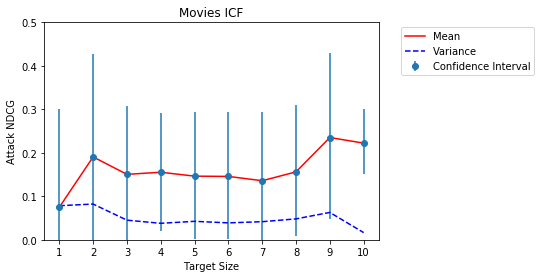

In [43]:
import csv

target_data_icf = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Target_Size'] in target_data_icf:
                target_data_icf[row['Target_Size']].append(row['NDCG'])
            else:
                target_data_icf[row['Target_Size']] = [row['NDCG']]
            
x = list(target_data_icf.keys())
y = [sum([float(v) for v in l]) /len(l) for l in list(target_data_icf.values())]

var = [np.var([float(v) for v in l]) for l in list(target_data_icf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(target_data_icf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies ICF")
plt.xlabel("Target Size")
plt.ylabel("Attack NDCG")
plt.gca().set_ylim(0, 0.05)
plt.ylim(0, 0.5)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

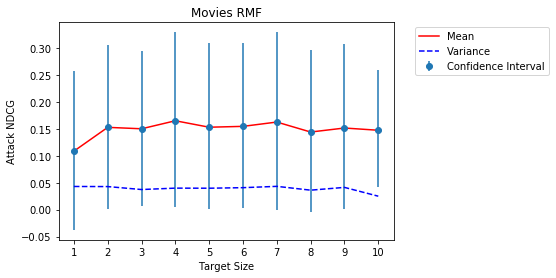

In [46]:
import csv

target_data_mf = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Target_Size'] in target_data_mf:
                target_data_mf[row['Target_Size']].append(row['NDCG'])
            else:
                target_data_mf[row['Target_Size']] = [row['NDCG']]
            
x = list(target_data_mf.keys())
y = [sum([float(v) for v in l]) /len(l) for l in list(target_data_mf.values())]

var = [np.var([float(v) for v in l]) for l in list(target_data_mf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(target_data_mf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies RMF")
plt.xlabel("Target Size")
plt.ylabel("Attack NDCG")
# plt.gca().set_ylim(0, 0.4)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

12 12


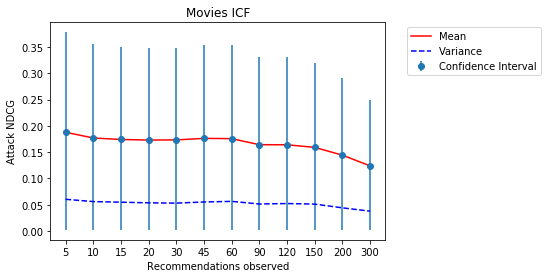

In [48]:
# How many user recommendations should we observe?
import csv

train_data_icf = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Num of Recs(K_O)'] in train_data_icf:
                train_data_icf[row['Num of Recs(K_O)']].append(row['NDCG'])
            else:
                train_data_icf[row['Num of Recs(K_O)']] = [row['NDCG']]
            
x = list(train_data_icf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_icf.values())[::-1]]

print(len(x), len(y))

var = [np.var([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies ICF")
plt.xlabel("Recommendations observed")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Attack NDCG")
plt.show()

12 12


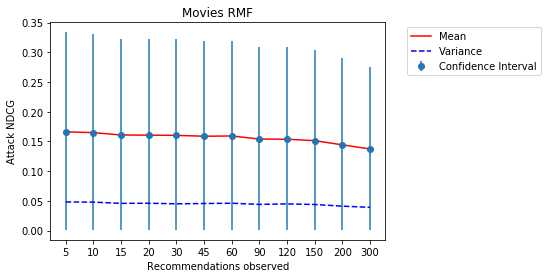

In [49]:
# How many user recommendations should we observe?
import csv

train_data_mf = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Num of Recs(K_O)'] in train_data_icf:
                train_data_icf[row['Num of Recs(K_O)']].append(row['NDCG'])
            else:
                train_data_icf[row['Num of Recs(K_O)']] = [row['NDCG']]
            
x = list(train_data_icf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_icf.values())[::-1]]

print(len(x), len(y))

var = [np.var([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies RMF")
plt.xlabel("Recommendations observed")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Attack NDCG")
plt.show()

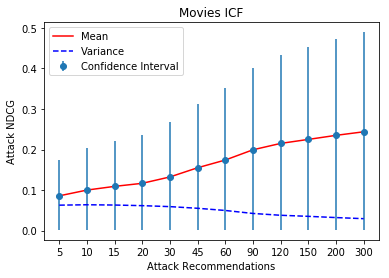

In [34]:
# How many attack recommendations yeild the max benefit?

import csv

train_data_icf = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Num_of_preds(K_A)'] in train_data_icf:
                train_data_icf[row['Num_of_preds(K_A)']].append(row['NDCG'])
            else:
                train_data_icf[row['Num_of_preds(K_A)']] = [row['NDCG']]
            
x = list(train_data_icf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_icf.values())[::-1]]

var = [np.var([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_icf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies ICF")
plt.xlabel("Attack Recommendations")
plt.ylabel("Attack NDCG")
plt.legend(loc="upper left")
plt.show()

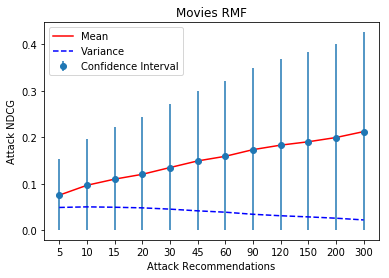

<Figure size 432x288 with 0 Axes>

In [35]:
# How many attack recommendations yeild the max benefit?

import csv

train_data_mf = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            if row['Num_of_preds(K_A)'] in train_data_mf:
                train_data_mf[row['Num_of_preds(K_A)']].append(row['NDCG'])
            else:
                train_data_mf[row['Num_of_preds(K_A)']] = [row['NDCG']]
            
x = list(train_data_mf.keys())[::-1]
y = [sum([float(v) for v in l]) /len(l) for l in list(train_data_mf.values())[::-1]]

var = [np.var([float(v) for v in l]) for l in list(train_data_mf.values())[::-1]]
cf = [calculate_confidence([float(v) for v in l]) for l in list(train_data_mf.values())[::-1]]

cf = [list(l) for l in cf]

plt.plot(x, y, linestyle='-', color = 'r', label = 'Mean')
plt.plot(x, var, linestyle = 'dashed', color ='b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(x,y,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies RMF")
plt.xlabel("Attack Recommendations")
plt.ylabel("Attack NDCG")
plt.legend(loc="upper left")
plt.show()
plt.savefig("My_Image.png", dpi=300, bbox_inches='tight')

[0.16594906646191562, 0.15067486918576836]
[0.05233120510599094, 0.04090171437859222]
[(0.16527119231677417, 0.16662694060705713), (0.1502386767802808, 0.1511110615912558)]


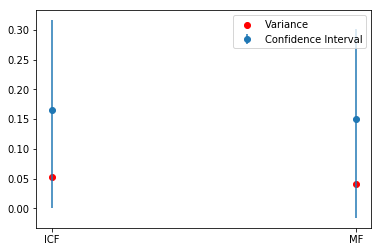

In [36]:
# Precision Metrics for both the algorithms

import csv
import statistics
from scipy.stats import norm
import seaborn as sns

precision, precision2 = [], []
train_data = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader: 
        if row['Rating'] == '5':
            precision.append(float(row['NDCG']))
            
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Rating'] == '5':
            precision2.append(float(row['NDCG']))

m1 = statistics.mean(precision)
m2 = statistics.mean(precision2)

v1 = np.var(precision)
v2 = np.var(precision2)

c1 = calculate_confidence(precision)
c2 = calculate_confidence(precision2)

min_error1 = c1[0]
max_error1 = c1[1]
yerror1 = [min_error1, max_error1]

min_error2 = c2[0]
max_error2 = c2[1]
yerror2 = [min_error2, max_error2]

yerror = [yerror1, yerror2]
mean = [m1, m2]

var = [v1, v2]
c = [c1, c2]

print(mean)
print(var)
print(c)
x = ['ICF', 'MF']
plt.scatter(x, var, color ='r', label = 'Variance')

plt.errorbar(x,mean,yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.legend()

plt.show()

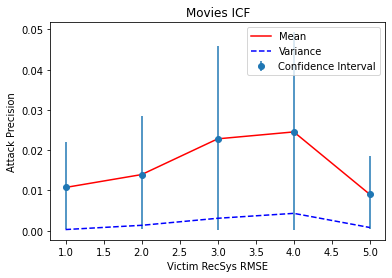

In [8]:
import math, csv, numpy as np
rmse_dict = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        r = int(float(row['RMSE']))
        if r in rmse_dict:
            rmse_dict[r].append(row['Precision'])
        else:
            rmse_dict[r] = [row['Precision']]
            
rmse_arr = list(rmse_dict.keys())
rmse_vals = [sum([(float(l)) for l in k])/len(k) for k in list(rmse_dict.values())]
rmse_dict = sorted(rmse_dict.items(), key = lambda kv:kv[0])

rmse_arr, rmse_vals, rmse = [], [], []

for val in rmse_dict:
    rmse_arr.append(float(val[0]))
    rmse_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
    rmse.append(val[1])
    
var = [np.var([float(v) for v in l]) for l in rmse]
cf = [calculate_confidence([float(v) for v in l]) for l in list(rmse)]

cf = [list(l) for l in cf]

plt.plot(rmse_arr, rmse_vals, linestyle = '-', color ='r', label = 'Mean')
plt.plot(rmse_arr, var, linestyle = "dashed", color = 'b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(rmse_arr, rmse_vals, yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies ICF")
plt.xlabel("Victim RecSys RMSE")
plt.ylabel("Attack Precision")
plt.legend()
plt.show()

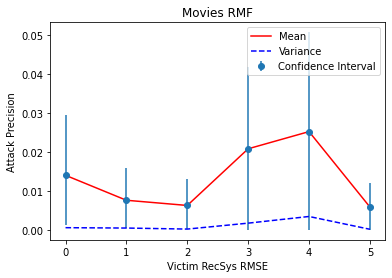

In [9]:
import math
rmse_dict = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        r = int(float(row['RMSE']))
        if r in rmse_dict:
            rmse_dict[r].append(row['Precision'])
        else:
            rmse_dict[r] = [row['Precision']]
            
rmse_arr = list(rmse_dict.keys())
rmse_vals = [sum([(float(l)) for l in k])/len(k) for k in list(rmse_dict.values())]
rmse_dict = sorted(rmse_dict.items(), key = lambda kv:kv[0])

rmse_arr, rmse_vals, rmse = [], [], []

for val in rmse_dict:
    rmse_arr.append(float(val[0]))
    rmse_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
    rmse.append(val[1])
    
var = [np.var([float(v) for v in l]) for l in rmse]
cf = [calculate_confidence([float(v) for v in l]) for l in list(rmse)]

cf = [list(l) for l in cf]

plt.plot(rmse_arr, rmse_vals, linestyle = '-', color ='r', label = 'Mean')
plt.plot(rmse_arr, var, linestyle = "dashed", color = 'b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(rmse_arr, rmse_vals, yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies RMF")
plt.xlabel("Victim RecSys RMSE")
plt.ylabel("Attack Precision")
plt.legend()
plt.show()

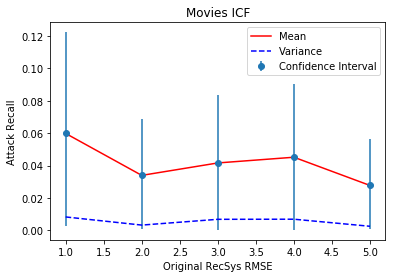

In [39]:
import math
rmse_dict = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        r = int(float(row['RMSE']))
        if r in rmse_dict:
            rmse_dict[r].append(row['Recall'])
        else:
            rmse_dict[r] = [row['Recall']]
            
rmse_arr = list(rmse_dict.keys())
rmse_vals = [sum([(float(l)) for l in k])/len(k) for k in list(rmse_dict.values())]
rmse_dict = sorted(rmse_dict.items(), key = lambda kv:kv[0])

rmse_arr, rmse_vals, rmse = [], [], []

for val in rmse_dict:
    rmse_arr.append(float(val[0]))
    rmse_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
    rmse.append(val[1])
    
var = [np.var([float(v) for v in l]) for l in rmse]
cf = [calculate_confidence([float(v) for v in l]) for l in list(rmse)]

cf = [list(l) for l in cf]

plt.plot(rmse_arr, rmse_vals, linestyle = '-', color ='r', label = 'Mean')
plt.plot(rmse_arr, var, linestyle = "dashed", color = 'b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(rmse_arr, rmse_vals, yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies ICF")
plt.xlabel("Original RecSys RMSE")
plt.ylabel("Attack Recall")
plt.legend()
plt.show()

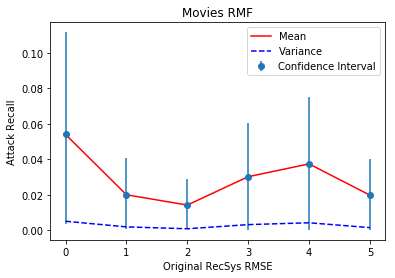

In [40]:
import math
rmse_dict = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        r = int(float(row['RMSE']))
        if r in rmse_dict:
            rmse_dict[r].append(row['Recall'])
        else:
            rmse_dict[r] = [row['Recall']]
            
rmse_arr = list(rmse_dict.keys())
rmse_vals = [sum([(float(l)) for l in k])/len(k) for k in list(rmse_dict.values())]
rmse_dict = sorted(rmse_dict.items(), key = lambda kv:kv[0])

rmse_arr, rmse_vals, rmse = [], [], []

for val in rmse_dict:
    rmse_arr.append(float(val[0]))
    rmse_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
    rmse.append(val[1])
    
var = [np.var([float(v) for v in l]) for l in rmse]
cf = [calculate_confidence([float(v) for v in l]) for l in list(rmse)]

cf = [list(l) for l in cf]

plt.plot(rmse_arr, rmse_vals, linestyle = '-', color ='r', label = 'Mean')
plt.plot(rmse_arr, var, linestyle = "dashed", color = 'b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(rmse_arr, rmse_vals, yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies RMF")
plt.xlabel("Original RecSys RMSE")
plt.ylabel("Attack Recall")
plt.legend()
plt.show()

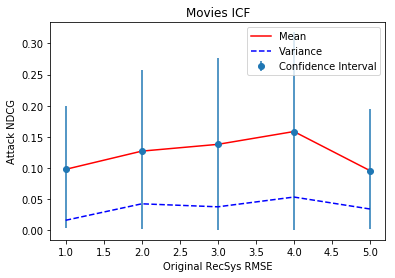

In [41]:
import math
rmse_dict = {}
with open('Final Results/Movies_results_icf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        r = int(float(row['RMSE']))
        if r in rmse_dict:
            rmse_dict[r].append(row['NDCG'])
        else:
            rmse_dict[r] = [row['NDCG']]
            
rmse_arr = list(rmse_dict.keys())
rmse_vals = [sum([(float(l)) for l in k])/len(k) for k in list(rmse_dict.values())]
rmse_dict = sorted(rmse_dict.items(), key = lambda kv:kv[0])

rmse_arr, rmse_vals, rmse = [], [], []

for val in rmse_dict:
    rmse_arr.append(float(val[0]))
    rmse_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
    rmse.append(val[1])
    
var = [np.var([float(v) for v in l]) for l in rmse]
cf = [calculate_confidence([float(v) for v in l]) for l in list(rmse)]

cf = [list(l) for l in cf]

plt.plot(rmse_arr, rmse_vals, linestyle = '-', color ='r', label = 'Mean')
plt.plot(rmse_arr, var, linestyle = "dashed", color = 'b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(rmse_arr, rmse_vals, yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies ICF")
plt.xlabel("Original RecSys RMSE")
plt.ylabel("Attack NDCG")
plt.legend()
plt.show()

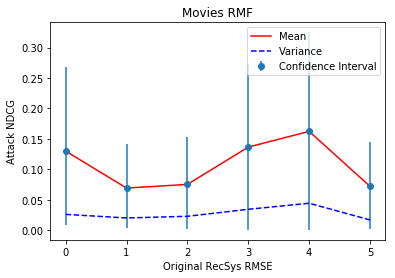

In [42]:
import math
rmse_dict = {}
with open('Final Results/Movies_results_mf.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        r = int(float(row['RMSE']))
        if r in rmse_dict:
            rmse_dict[r].append(row['NDCG'])
        else:
            rmse_dict[r] = [row['NDCG']]
            
rmse_arr = list(rmse_dict.keys())
rmse_vals = [sum([(float(l)) for l in k])/len(k) for k in list(rmse_dict.values())]
rmse_dict = sorted(rmse_dict.items(), key = lambda kv:kv[0])

rmse_arr, rmse_vals, rmse = [], [], []

for val in rmse_dict:
    rmse_arr.append(float(val[0]))
    rmse_vals.append((sum(float(l) for l in val[1]))/len(val[1]))
    rmse.append(val[1])
    
var = [np.var([float(v) for v in l]) for l in rmse]
cf = [calculate_confidence([float(v) for v in l]) for l in list(rmse)]

cf = [list(l) for l in cf]

plt.plot(rmse_arr, rmse_vals, linestyle = '-', color ='r', label = 'Mean')
plt.plot(rmse_arr, var, linestyle = "dashed", color = 'b', label = 'Variance')
min_error = [l[0] for l in cf]
max_error = [l[1] for l in cf]
yerror = [min_error, max_error]
plt.errorbar(rmse_arr, rmse_vals, yerr=yerror, fmt='o', label = 'Confidence Interval')

plt.title("Movies RMF")
plt.xlabel("Original RecSys RMSE")
plt.ylabel("Attack NDCG")
plt.legend()
plt.show()